Plot2: Plots showing the time of break-ins. The time of the day might not represent the actual time when the break-in happened as people only report it later. Clearly there are more break-ins on the weekend while the distribution over the year is fairly flat

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as cl
from matplotlib.colors import LogNorm
import time
import datetime
import re
from utilities import CensusTractFinder
from utilities import AFFData
from utilities import Geometry

In [4]:
fname = 'Car_Break_Ins_Clean.csv'
data = pd.read_csv(fname, quotechar='"')

dateformat = '%m/%d/%Y'
ref_date = time.mktime(time.strptime('01/01/2018', dateformat))
p_date = re.compile('(\d{2})/(\d{2})/(\d{4})')
p_time = re.compile('(\d{2}):(\d{2})')

In [13]:
t = []
w = []
m = []
for entry in np.array(data[['Date', 'Time']].as_matrix().astype(str)):
    weekday = datetime.datetime.strptime(entry[0], dateformat).weekday()
    
    date_matches = p_date.match(entry[0])
    time_matches = p_time.match(entry[1])
    
    if int(date_matches.group(1)) == 2 and int(date_matches.group(2)) == 29:
        continue
    
    month = time.mktime(time.strptime('%02i/%02i/2018'%(int(date_matches.group(1)), int(date_matches.group(2))), dateformat))
    
    time_of_day = (float(time_matches.group(1))*60 + float(time_matches.group(2)))/60
    time_of_year = (time_of_day + (month - ref_date)/3600)/24
    time_of_week = (time_of_day + weekday*24)/24

    t.append(time_of_day)
    w.append(weekday)
    m.append(time_of_year)

In [14]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(12,4))

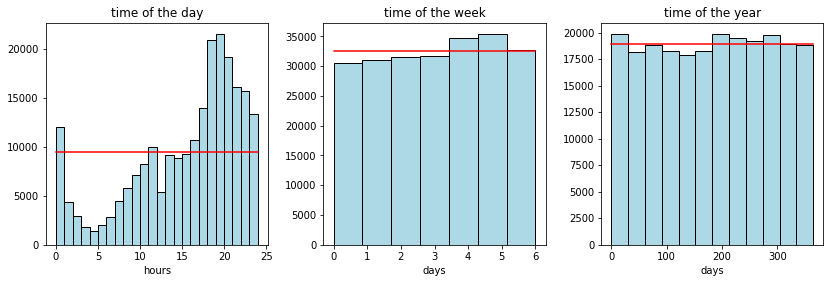

In [15]:
data1, _, _, = ax1.hist(t, bins=24, facecolor='lightblue', edgecolor='black')
data2, _, _, = ax2.hist(w, bins=7, facecolor='lightblue', edgecolor='black')
data3, _, _, = ax3.hist(m, bins=12, facecolor='lightblue', edgecolor='black')

avg_time_of_day = np.mean(np.array(data1))
avg_weekday = np.mean(np.array(data2))
avg_time_of_year = np.mean(np.array(data3))

ax1.plot([0,24], [avg_time_of_day, avg_time_of_day], color='red')
ax2.plot([0,6], [avg_weekday, avg_weekday], color='red')
ax3.plot([0,365], [avg_time_of_year, avg_time_of_year], color='red')

ax1.set_title('time of the day')
ax2.set_title('time of the week')
ax3.set_title('time of the year')

ax1.set_xlabel('hours')
ax2.set_xlabel('days')
ax3.set_xlabel('days')

fig.subplots_adjust(left=0.05, right=0.95, bottom=0.11, top=0.88, wspace=0.25, hspace=0.2)

plt.show()

In [18]:
print avg_weekday
print data2

data2_avg = (data2 - avg_weekday)/avg_weekday*100

print data2_avg

32539.0
[ 30555.  31022.  31609.  31680.  34716.  35471.  32720.]
[-6.09729863 -4.66209779 -2.85810873 -2.63990903  6.69043302  9.01072559
  0.55625557]
